In [19]:
import pandas as pd
import numpy as np
import random
import math
import gc
import matplotlib.pylab as plt
import networkx as nx
from copy import deepcopy

# Graph Initialization

In [20]:
random.seed(1)
nodes = 100
adjacency_matrix = np.zeros((nodes,nodes),dtype = np.int)

edge_probability = .0085 if nodes > 100 else 0.09

edges = []
edges_cnt = 0
for i in range(nodes):
    for j in range(i):
        prob = random.random()
        if prob < edge_probability:
            adjacency_matrix[i,j] = 1
            edges.append((i,j))
            edges_cnt += 1
            
adjacency_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
G=nx.Graph()
G.add_nodes_from(list(range(0,nodes)))
G.add_edges_from(edges)

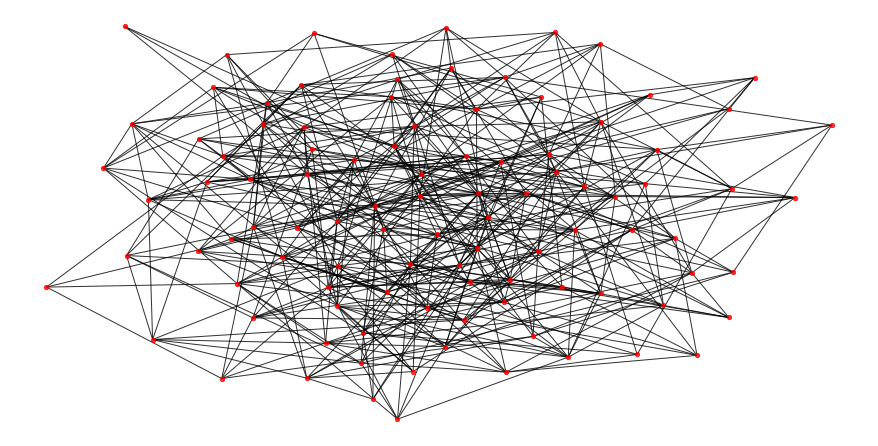

In [22]:
plt.figure(figsize=(12,6))
nx.draw(G,node_color='r', node_size=18, alpha=0.8)
plt.show() # display

# Greedy Algorithm

In [23]:
#Vertex Cover Greedy Algorithm
visited = np.zeros(nodes)
greedy_vertex_dict = {}
greedy_edges = deepcopy(edges)

for vertex in range(nodes):
    greedy_vertex_dict[vertex] = sum(adjacency_matrix[vertex])

greedy_vertex_dict_ordered = dict(sorted(greedy_vertex_dict.items(), key=lambda item: item[1], reverse=True))

greedy_count = 0
vcount = 0
for vertex in greedy_vertex_dict_ordered:
    to_remove = set()
    for edge in greedy_edges:
        if vertex in edge:
            to_remove.add(edge)
    for edge in to_remove:
        greedy_edges.remove(edge)
    greedy_count += 1
    if len(greedy_edges) == 0: 
        break

In [24]:
print("Vertex cover consists of {} nodes".format(greedy_count))

Vertex cover consists of 93 nodes


In [25]:
approximation_algo_result = greedy_count
approximation_algo_result

93

# Genetic Algorithm

In [26]:
# Init
n = nodes
total_population = 15 #Maximum population allowed in environment
population_init = 10
max_iterations = 50

cross_over_prob = 0.50
mutation_prob = 0.05
    
def chromosomes_generation(n,k,population_init):
    """n: int -> total vertices,
    k: int -> number of vertices in our solution vertex cover,
    popoulation_init: int -> initial population
    
    Description: Randomly initialize population with k vertices as our vertex cover 

    Args:
        n (int): total vertices
        k (int): number of vertices in our solution vertex cover
        population_init (int): initial_population

    Returns:
        List[List[int]]: vertex cover with k vertices
    """
    vertex_cover = []
    for i in range(population_init):
        chromosome = np.zeros(n,dtype=int)
        samples = random.sample(range(n),k=k)
        
        for j in range(k):
            chromosome[samples[j]] = 1
        vertex_cover.append(chromosome)
    return vertex_cover

print(chromosomes_generation(n,3,population_init))

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
def cost(soln,edges):
    """
    Description: We use this to measure fitness. Given our vertex cover, we measure how many edges are missed.

    Args:
        soln (List[int]): list of k vertices
        edges (List[Tuple[int]]): list of edges

    Returns:
        int: number of missed edges
    """
    count = 0
    for e in edges:
        (u,v) = e
        if soln[u] == 0 and soln[v] == 0:
            count+=1
    return count

In [28]:
def selection_fittest(vertex_cover,total_population,edges):
    """
    Description: selection basis to pass solutions to next generation.
    This function just selects top performing solutions and passes them on to the next generation

    Args:
        vertex_cover (List[int]): list of k vertices
        total_population (int): total population
        edges (List[Tuple[int]]): list of edges
    """
    score = []
    output_lst = []
    len_vertex_cover = len(vertex_cover)
    
    for i in range(len_vertex_cover):
        score.append(cost(vertex_cover[i],edges))
    sorted_index = np.argsort(score)
    
    for i in range(len_vertex_cover):
        output_lst.append(vertex_cover[sorted_index[i]])
        if i+1 == total_population:
            break
        
    vertex_cover = output_lst
    return vertex_cover, score[sorted_index[0]]

In [29]:
def cross_over_and_mutate(vertex_cover,n,k,mutation_prob,edges):
    """
    Description: Mutation and crosssover step happens here
    """
    new_vertex_cover = vertex_cover.copy()
    len_vertex_cover = len(vertex_cover)
    variations = 1
    
    # Crossover happens here
    
    for i in range(len_vertex_cover):
        #First solution
        parent_1 = vertex_cover[i].copy()
        #Second solution 
        parent_2 = vertex_cover[int(random.uniform(0,len_vertex_cover))] 
        
        parent_1_unique = []
        parent_2_unique = []
        
        # Store the vertices of both solutions
        for j in range(n):
            if parent_1[j] ==1:
                parent_1_unique.append(j)
                
            if parent_2[j] == 1:
                parent_2_unique.append(j)
                
        # Find vertices from parent 1 which are in parent 2 and shuffle
        parent_1_unique =np.setdiff1d(parent_1,parent_2)
        random.shuffle(parent_1_unique)
        
        # Find vertices from parent 2 which are in parent 1 and shuffle
        parent_2_unique =np.setdiff1d(parent_2,parent_1)
        random.shuffle(parent_2_unique)
        
        # Swap half of the unique vertices from parent 2 into parent 1 -> New solution
        swap = math.ceil(cross_over_prob * min(len(parent_1_unique),len(parent_2_unique)))
        for j in range(swap):
              parent_1[parent_2_unique[j]] = 1
              parent_1[parent_2_unique[j]] = 0
              
        #Mutation happens here
        
        zeroes = []
        ones = []
        for j in range(n):
            if parent_1[j] == 1:
                ones.append(j)
            else:
                zeroes.append(j)
                
        random.shuffle(ones)
        random.shuffle(zeroes)
        
        coin_toss = random.random()
        if coin_toss <= 0.5:
            swaps =  min(len(ones),len(zeroes))
            
            for j in range(swaps):
                coin_toss_2 = random.random()
                if coin_toss_2 < mutation_prob:
                    parent_1[ones[j]] = 0
                    parent_1[zeroes[j]] = 1
                    #Swapping logic
                    dummy = ones[j]
                    ones[j] = zeroes[j]
                    zeroes[j] = dummy
        else:
            mutate_lst = []
            for e in edges:
                (u,v) = e
                if((parent_1[u] == 0) and (parent_1[v] == 0)):
                    coin_toss2 = random.random()
                    if(coin_toss2 < mutation_prob):
                        coin_toss3 = random.random()
                        if(coin_toss3 <= 0.5):
                            if(u not in mutate_lst):
                                mutate_lst.append(u)
                        else:
                            if(v not in mutate_lst):
                                mutate_lst.append(v)
            
            random.shuffle(mutate_lst)
            mutated_swaps = min(len(ones),len(mutate_lst))

            for j in range(mutated_swaps):
                parent_1[ones[j]] = 0
                parent_1[mutate_lst[j]] = 1
                #Swapping logic
                dummy = ones[j]
                ones[j] = mutate_lst[j]
                mutate_lst[j] = dummy
        
        new_vertex_cover.append(parent_1)
    return new_vertex_cover
    

In [30]:
def environment(n,k,mutation_prob,population_init,total_population,max_iterations,edges):
    vertex_cover = chromosomes_generation(n,k,population_init)
    for it in range(max_iterations):
        vertex_cover = cross_over_and_mutate(vertex_cover,n,k,mutation_prob,edges)
#         return
        vertex_cover,cost_value = selection_fittest(vertex_cover,total_population,edges)
        if (it%10)==9:
            print("k = {}, Iteration = {}, Cost = {}".format(k,it+1,cost_value))
        if cost_value==0:
            break
    result = []
    soln = vertex_cover[0]
    for j in range(len(soln)):
        if(soln[j] == 1):
            result.append(j)
    print("k = {}, Iteration = {}, Cost = {}\nSoln = {}".format(k,it,cost_value,result))
    return cost_value,result

In [31]:
# For garbage collection
def free_memory():
    gc.collect()

In [32]:
def optimize_for_best_k(n,mutation_prob,population_init,total_population,max_iterations,edges,start,end):
    """
    Description: Perform binary search with k and find out the minimum k to cover all vertices
    """
    result_dict = {}
    l = start
    h = end
    ans = 0
    while(l<=h):
        m = int((l+h)/2)
        cost_value,result = environment(n,m,mutation_prob,population_init,total_population,max_iterations,edges)
        # print("Cost is {} result is {}".format(cost_value,result))
        if(cost_value==0):
            result_dict[m] = result
            h = m-1
        else:
            l = m + 1
    return result_dict


In [33]:
free_memory()
result = optimize_for_best_k(n,mutation_prob,population_init,total_population,max_iterations,edges,int(approximation_algo_result/2),n)

k = 73, Iteration = 10, Cost = 12
k = 73, Iteration = 20, Cost = 9
k = 73, Iteration = 30, Cost = 6
k = 73, Iteration = 40, Cost = 3
k = 73, Iteration = 50, Cost = 2
k = 73, Iteration = 49, Cost = 2
Soln = [0, 1, 2, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 23, 24, 27, 28, 30, 31, 33, 34, 35, 36, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 55, 56, 57, 58, 60, 61, 62, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 92, 93, 95, 97, 98, 99]
k = 87, Iteration = 10, Cost = 3
k = 87, Iteration = 20, Cost = 1
k = 87, Iteration = 30, Cost = 1
k = 87, Iteration = 37, Cost = 0
Soln = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 46, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
k = 80, Iteration = 10, Cost =

In [34]:
result.keys()

dict_keys([87, 83, 81])

In [35]:
min_key = 0
min_len = 10000000000000000
best_solution = []
for key,value in result.items():
    if len(value) < min_len:
        min_key = key
        min_len= len(value)
        best_solution = result[key]
print(min_len)

81


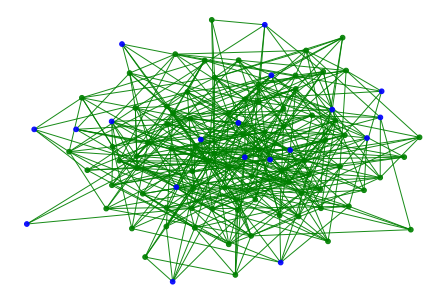

Genetic: 81


In [36]:
color_map = []
for node in G:
    if node in best_solution:
        color_map.append('green')
    else: 
        color_map.append('blue')      

edge_colours = []
for (u,v) in G.edges():
    if u in best_solution or v in best_solution:
        edge_colours.append("green")
    else:
        edge_colours.append("red")
        
nx.draw(G, node_color=color_map, edge_color=edge_colours, node_size=22, alpha=0.9)
plt.show()

print(f"Genetic: {min_len}")